## Лабораторная работа №2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [34]:
data = pd.read_csv("imdb_top_1000.csv")

In [35]:
data = data.drop('Poster_Link', 1)
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [36]:
data_features = list(zip(
[i for i in data.columns], # название признака
zip(
    [str(i) for i in data.dtypes], # типы колонок
    [i for i in data.isnull().sum()] # количество пропусков в колонке
)))
data_features # Признаки с типом данных и количеством пропусков

[('Series_Title', ('object', 0)),
 ('Released_Year', ('object', 0)),
 ('Certificate', ('object', 101)),
 ('Runtime', ('object', 0)),
 ('Genre', ('object', 0)),
 ('IMDB_Rating', ('float64', 0)),
 ('Overview', ('object', 0)),
 ('Meta_score', ('float64', 157)),
 ('Director', ('object', 0)),
 ('Star1', ('object', 0)),
 ('Star2', ('object', 0)),
 ('Star3', ('object', 0)),
 ('Star4', ('object', 0)),
 ('No_of_Votes', ('int64', 0)),
 ('Gross', ('object', 169))]

### Устранение пропусков

In [37]:
# Доля (процент) пропусков для каждого признака
[(c, data[c].isnull().mean()) for c in data.columns]

[('Series_Title', 0.0),
 ('Released_Year', 0.0),
 ('Certificate', 0.101),
 ('Runtime', 0.0),
 ('Genre', 0.0),
 ('IMDB_Rating', 0.0),
 ('Overview', 0.0),
 ('Meta_score', 0.157),
 ('Director', 0.0),
 ('Star1', 0.0),
 ('Star2', 0.0),
 ('Star3', 0.0),
 ('Star4', 0.0),
 ('No_of_Votes', 0.0),
 ('Gross', 0.169)]

In [38]:
# Удаление колонок, содержащих пустые значения
data.dropna(axis=1, how='any')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544
996,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374
998,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471


In [39]:
# Удаление колонок с высоким процентом пропусков (более 50%)
data.dropna(axis=1, thresh=730)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [40]:
# Заполним пропуски рейтинга средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Meta_score', data['Meta_score'].mean())

In [42]:
# Убедимся, что признак Meta_score не имеет пустых значений
data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Кодирование категориальных признаков

In [43]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Certificate'])

In [53]:
data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [54]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [55]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

array(['16', 'A', 'Approved', 'G', 'GP', 'PG', 'PG-13', 'Passed', 'R',
       'TV-14', 'TV-MA', 'TV-PG', 'U', 'U/A', 'UA', 'Unrated', nan],
      dtype=object)

In [56]:
pip install category_encoders

You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [57]:
#CountEncoder
from category_encoders.count import CountEncoder as ce_CountEncoder

In [65]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['Certificate'])])
data_COUNT_ENC.head()

,Director,Genre,Gross,IMDB_Rating,Meta_score,No_of_Votes,Overview,Released_Year,Runtime,Series_Title,Star1,Star2,Star3,Star4
0,2,85,1,9.3,80.0,2343110,1,13,6,1,1,1,1,1
1,5,26,1,9.2,100.0,1620367,1,8,1,1,2,3,1,2
2,8,30,1,9.0,84.0,2303232,1,21,6,1,8,2,1,4
3,5,26,1,9.0,90.0,1129952,1,6,2,1,10,3,2,2
4,5,26,5,9.0,96.0,689845,1,9,17,1,3,1,2,1


In [66]:
data_COUNT_ENC['Released_Year'].unique()

array([13,  8, 21,  6,  9, 22, 23, 17, 27,  7, 19, 32, 12,  3,  5, 18, 26,
       11,  1, 28, 24, 29,  4, 31,  2, 25, 10], dtype=int64)

In [67]:
data['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [69]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['Certificate'])])
data_FREQ_ENC.head()

,Director,Genre,Gross,IMDB_Rating,Meta_score,No_of_Votes,Overview,Released_Year,Runtime,Series_Title,Star1,Star2,Star3,Star4
0,0.002,0.085,0.001,9.3,80.0,2343110,0.001,0.013,0.006,0.001,0.001,0.001,0.001,0.001
1,0.005,0.026,0.001,9.2,100.0,1620367,0.001,0.008,0.001,0.001,0.002,0.003,0.001,0.002
2,0.008,0.030,0.001,9.0,84.0,2303232,0.001,0.021,0.006,0.001,0.008,0.002,0.001,0.004
3,0.005,0.026,0.001,9.0,90.0,1129952,0.001,0.006,0.002,0.001,0.010,0.003,0.002,0.002
4,0.005,0.026,0.005,9.0,96.0,689845,0.001,0.009,0.017,0.001,0.003,0.001,0.002,0.001


In [70]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

In [72]:
#HelmetEncoder
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['Certificate'])], data['Certificate'])
data_HELM_ENC.head()

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,Director_8,...,Star4_928,Star4_929,Star4_930,Star4_931,Star4_932,Star4_933,Star4_934,Star4_935,Star4_936,Star4_937
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Нормализация числовых признаков

In [73]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


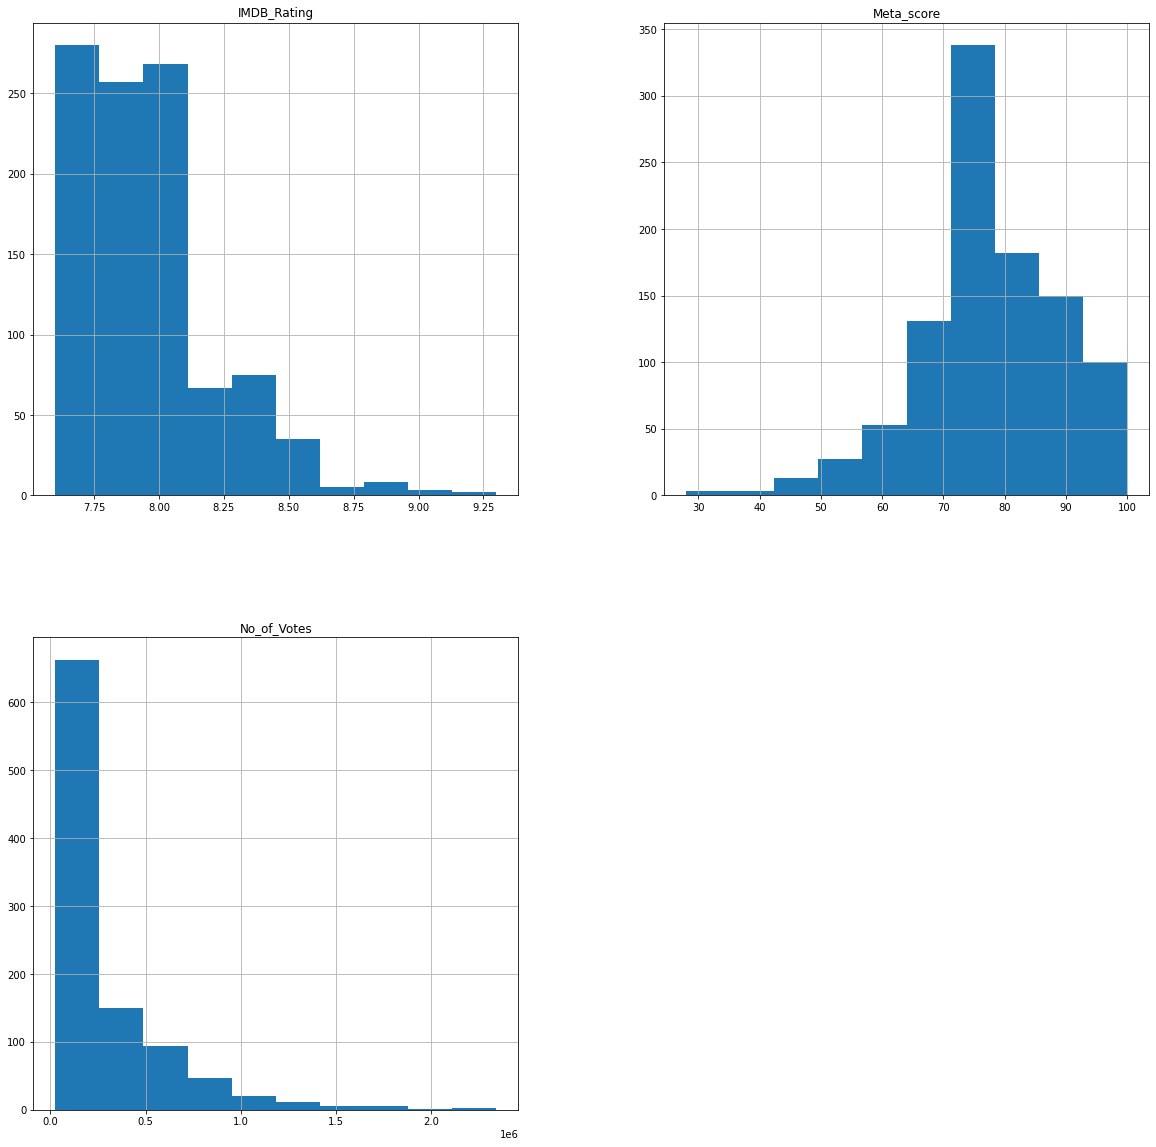

In [74]:
data.hist(figsize=(20,20))
plt.show()

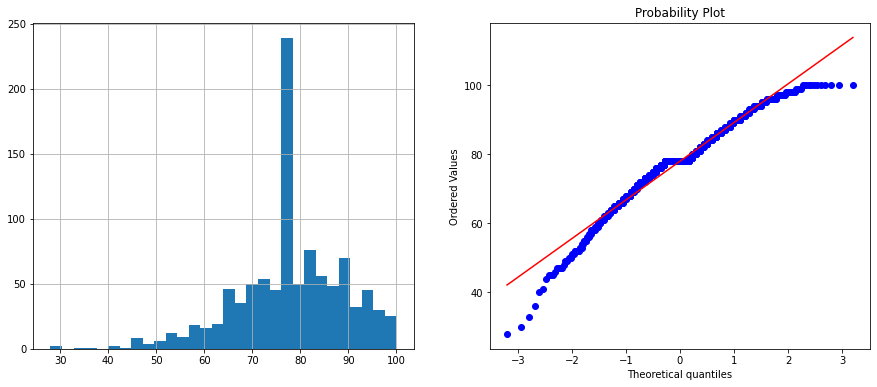

In [78]:
diagnostic_plots(data, 'Meta_score')

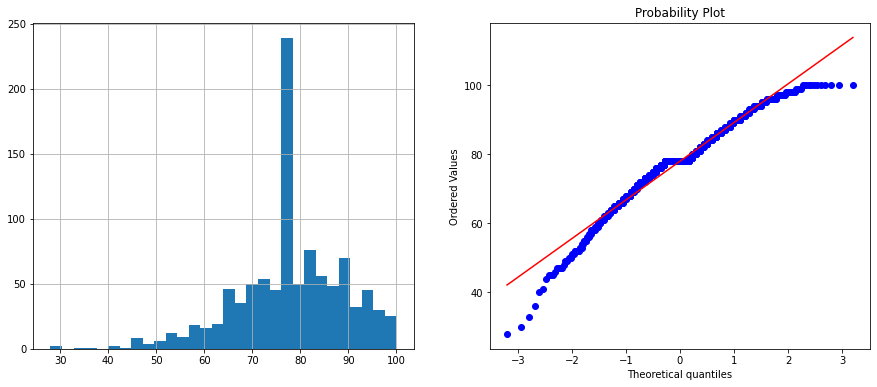

In [82]:
#Логарифмическое преобразование
data['1stFlrSF'] = np.log(data['Meta_score'])
diagnostic_plots(data, 'Meta_score')

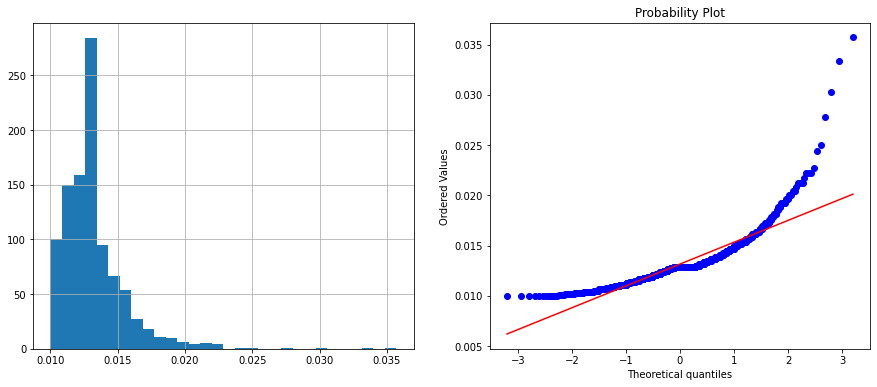

In [83]:
#Обратное преобразование
data['Meta_score_reciprocal'] = 1 / (data['Meta_score']) 
diagnostic_plots(data, 'Meta_score_reciprocal')

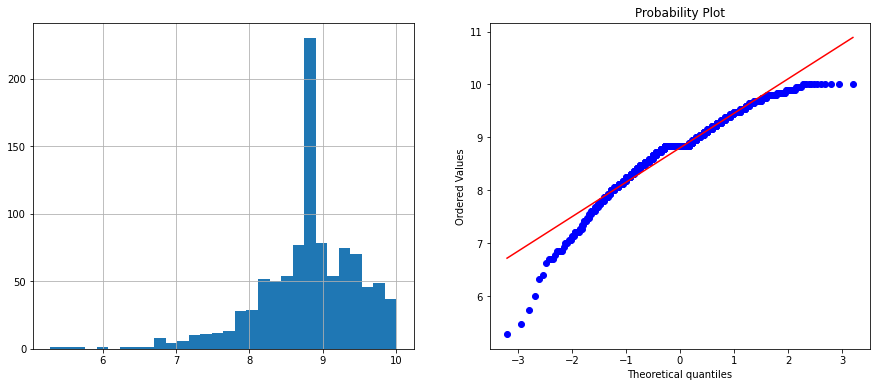

In [84]:
#Квадратный корень
data['Meta_score_sqr'] = data['Meta_score']**(1/2) 
diagnostic_plots(data, 'Meta_score_sqr')

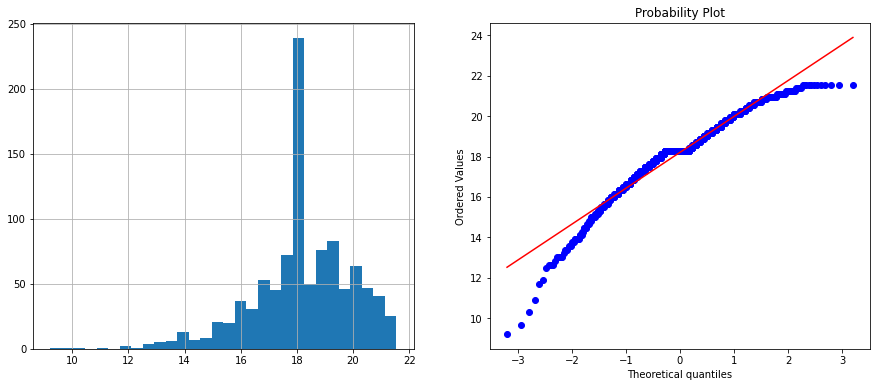

In [85]:
#Возведение в степень
data['Meta_score_exp1'] = data['Meta_score']**(1/1.5)
diagnostic_plots(data, 'Meta_score_exp1')

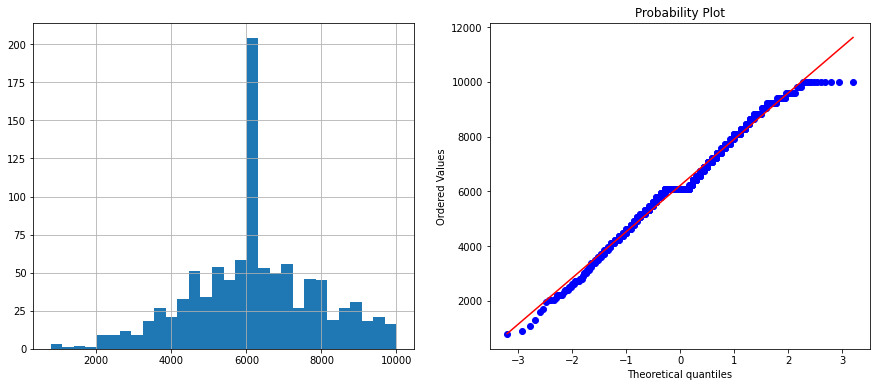

In [86]:
data['Meta_score_exp2'] = data['Meta_score']**(2)
diagnostic_plots(data, 'Meta_score_exp2')

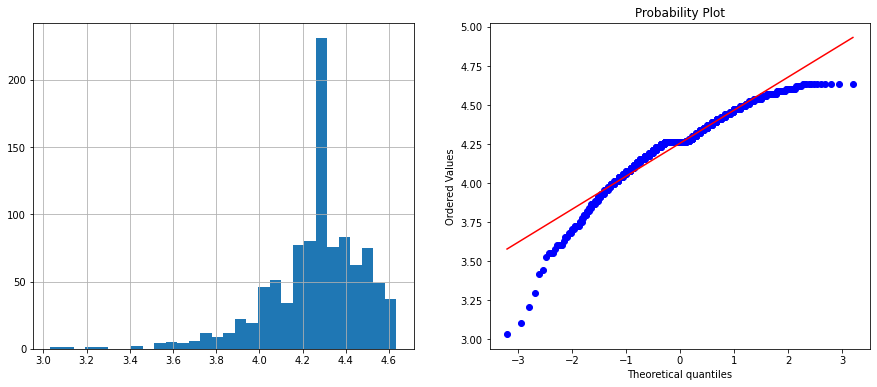

In [88]:
data['Meta_score_exp3'] = data['Meta_score']**(0.333)
diagnostic_plots(data, 'Meta_score_exp3')

Оптимальное значение λ = 2.2132273725967844


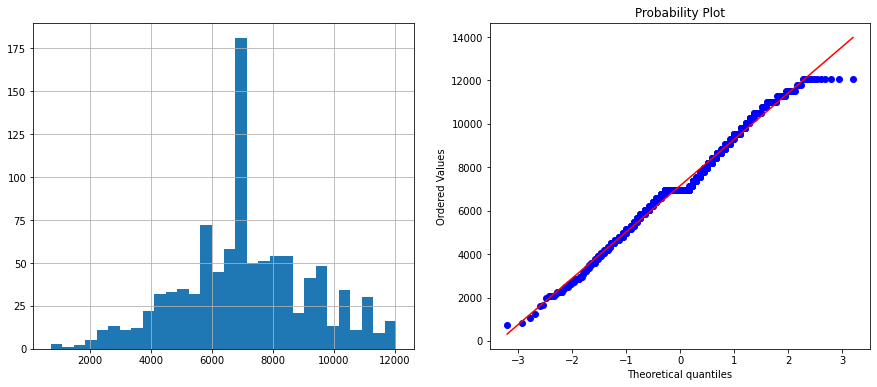

In [89]:
#Преобразованиея Бокса-Кокса
data['Meta_score_boxcox'], param = stats.boxcox(data['Meta_score']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Meta_score_boxcox')